In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Daily_cases_withDate.csv')

In [3]:
df.drop('Date',axis=1,inplace=True)
#here we are dropping Date column as it conveys the same data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date_YMD         641 non-null    object
 1   Daily Confirmed  641 non-null    int64 
 2   Total Confirmed  641 non-null    int64 
 3   Daily Recovered  641 non-null    int64 
 4   Total Recovered  641 non-null    int64 
 5   Daily Deceased   641 non-null    int64 
 6   Total Deceased   641 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 35.2+ KB


In [5]:
#checking for null values
df.isnull().sum()
#there are no null values in the dataset

Date_YMD           0
Daily Confirmed    0
Total Confirmed    0
Daily Recovered    0
Total Recovered    0
Daily Deceased     0
Total Deceased     0
dtype: int64

In [6]:
#checking for duplicate entires
df[df.duplicated()]
#there are no duplicate entries in the data set

,Date_YMD,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased


In [7]:
num_col=df.select_dtypes(np.number)

In [8]:

#removing negative values 
for col in num_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    ll = q1 - (1.5*iqr)
    ul = q3 + (1.5*iqr)
    for ind in df[col].index:
        if  df.loc[ind,col]<ll:
            df.loc[ind,col]=ll
        else:
            pass

In [9]:
#checking for  relationship between variables
df.corr()

,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Daily Confirmed,1.000000,0.245865,0.919745,0.189828,0.842196,0.180485
Total Confirmed,0.245865,1.000000,0.333657,0.998257,0.337445,0.995855
Daily Recovered,0.919745,0.333657,1.000000,0.278638,0.932707,0.264011
Total Recovered,0.189828,0.998257,0.278638,1.000000,0.287028,0.998138
Daily Deceased,0.842196,0.337445,0.932707,0.287028,1.000000,0.271664
Total Deceased,0.180485,0.995855,0.264011,0.998138,0.271664,1.000000


In [10]:
# let us consider Daily_confirmed as our target variable and other variables as our independent varaible
df['Daily Confirmed'].head()

0    1
1    0
2    0
3    1
4    1
Name: Daily Confirmed, dtype: int64

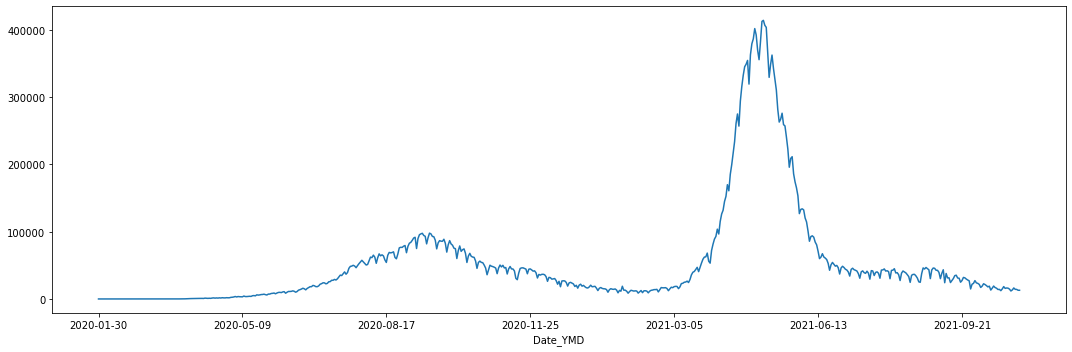

In [11]:
#visualizing the data
plt.figure(figsize=[15,5])
df.groupby('Date_YMD')['Daily Confirmed'].sum().plot(kind='line')
plt.tight_layout()

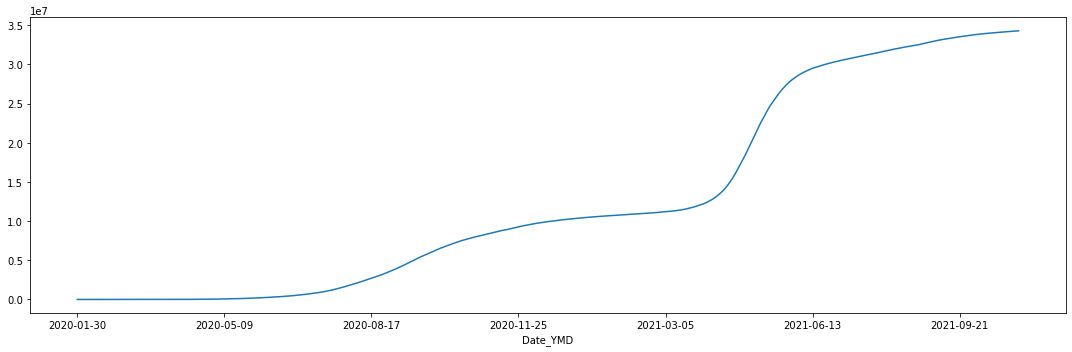

In [12]:
#visualizing the data
plt.figure(figsize=[15,5])
df.groupby('Date_YMD')['Total Confirmed'].sum().plot(kind='line')
plt.tight_layout()

In [13]:
#here total confirmed and daily confirmed convay the same data so we are just considering Daily Confirmed,Daily Recovered,Daily Deceased column


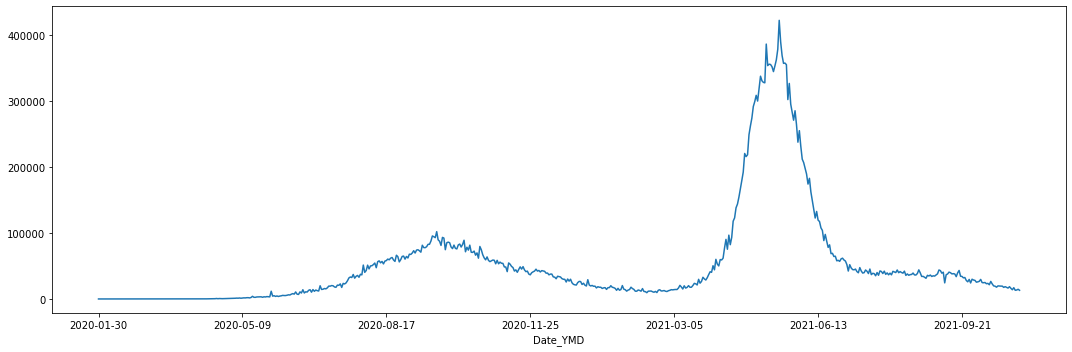

In [14]:
#visualising the data
plt.figure(figsize=[15,5])
df.groupby('Date_YMD')['Daily Recovered'].sum().plot(kind='line')
plt.tight_layout()

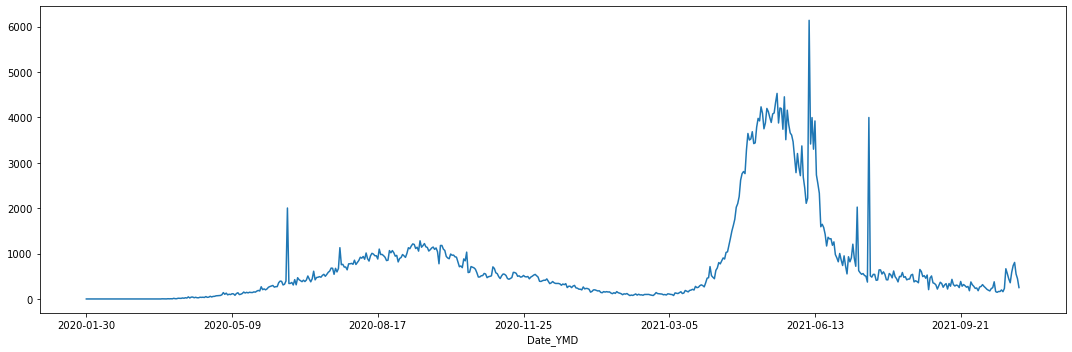

In [15]:
plt.figure(figsize=[15,5])
df.groupby('Date_YMD')['Daily Deceased'].sum().plot(kind='line')
plt.tight_layout()

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Confirmed', ylabel='Daily Recovered'>

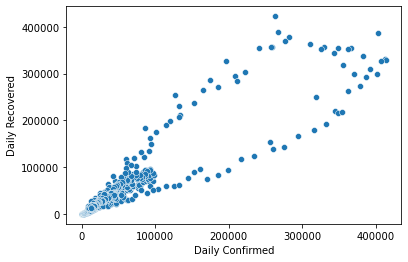

In [16]:
sns.scatterplot(df['Daily Confirmed'],df['Daily Recovered'])
#we can cay that as the number of cases increased rapidly the number of recovered cases also have been increasing following a positive realationship

C:\Users\chera\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Daily Confirmed', ylabel='Daily Deceased'>

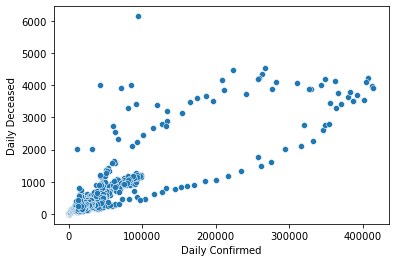

In [17]:
sns.scatterplot(df['Daily Confirmed'],df['Daily Deceased'])
#we can also see as the number of cases increasing the number of people are also getting Deseased

 Statistical Analayis on the Target variable .

Hypothesis: H0:Daily_confirmed_cases <=60000

HA:Daily_confirmed_cases >60000

In [18]:
#*****************************************************
#inference(3)

In [19]:
#lets take alpha values as 0.01 as for owr buisness need 
alpha=0.01

In [20]:
import scipy.stats as st

In [21]:
xbar=df['Daily Confirmed'].mean()
s=df['Daily Confirmed'].std(ddof=1)
mue=60000
n=len(df['Daily Confirmed'])
se=s/np.sqrt(n)
t_stat=(xbar-mue)/se#t test 
t_critic=st.t.isf(alpha,n-1)

In [22]:
#p value for the t test
p_value=st.t.cdf(t_stat,n-1)

In [23]:
#critical value approch
st.t.interval(alpha,n-1,xbar,se)
#with 99% confidence interval say that the average total cases lies between 53448 and 53526

(53448.519090860835, 53526.20477809392)

In [24]:
print(p_value,t_stat,t_critic)

0.01796019720309002 -2.1022623313521605 2.3321885424342335


Since P value is less than alpha we fail reject H0 so this says on average the daily confirmed cases are less than or equal to 55000 every day but as we increase the Average cases to a 60000 the p value is getting rejected by this shows the on average the no of cases day wise will range between 55000 and 60000

Building a model with Total Daily Cases as  (target Variable) and Other variables as independent.

Since our Target variable is Continuous we will be doing a Regression Analysis

In [25]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro

In [26]:
# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.stats.stattools import durbin_watson

In [27]:
df.drop(['Date_YMD','Total Confirmed','Total Recovered','Total Deceased'],axis=1,inplace=True)
#since we are doing analysis on Daily Cases we are removing Total cases related columns and date column

In [28]:
X=df.drop('Daily Confirmed',axis=1)
sm_X=sm.add_constant(X)
y=df['Daily Confirmed']

In [29]:
X_train,X_test,y_train,y_test=train_test_split(sm_X,y,test_size=0.3,random_state=101)
#so we are splitting the data into train and test with test size 0.3

In [30]:
#building a basic model
model=sm.OLS(y_train,X_train).fit()

In [31]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Daily Confirmed   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     1210.
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          1.17e-180
Time:                        19:25:19   Log-Likelihood:                -5301.3
No. Observations:                 448   AIC:                         1.061e+04
Df Residuals:                     445   BIC:                         1.062e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4352.1304   1972.630      2.206      0.028     475.302    8228.959
Daily Recovered     1.0616      0.059     17.885      0.000       0.945       1.178
Daily Deceased     -8.9254      4.719     -1.891      0.059     -18.201       0.350
==============================================================================
Omnibus:                      138.010   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1185.524
Skew:                           1.065   Prob(JB):                    3.69e-258
Kurtosis:                      10.679   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
#predicting the train data to check the performance
y_train_predicted=model.predict(X_train)
#calculating the MAE for the train data
mse=mean_squared_error(y_train,y_train_predicted)
#calculating the RMSE
print('RMSE for train data:',np.sqrt(mse))

RMSE for train data: 33336.184388461654


In [33]:
#predicting the test data to check the performance
y_test_predicted=model.predict(X_test)
#calculating the MAE for the test data
mse=mean_squared_error(y_test,y_test_predicted)
#calculating the RMSE
print('RMSE for test data:',np.sqrt(mse))

RMSE for test data: 22975.692421546162


since the RMSE for train and test  data  is not  that significant we can say the model is not performing well in the test stage,But the model is explaining 84%  of the data

### Fine Tune 

We are going to fine tune to model by transforming the features and using different models.

In [35]:
#checking for skweness in the features
X.skew()

Daily Recovered    2.799960
Daily Deceased     2.481664
dtype: float64

In [36]:
#transforming the independent and dependent variable
X=np.sqrt(X)
y=np.sqrt(y)

In [37]:
#splitting the data set and building a model with the tunned features

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
#so we are splitting the data into train and test with test size 0.3

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble  import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

In [40]:
#Linear regression model(model:2)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [41]:
y_train_predict=lr.predict(X_train)
print('RMSE of train data',np.sqrt(mean_squared_error(y_train,y_train_predict)))

RMSE of train data 41.02756349373323


In [42]:
y_test_predict=lr.predict(X_test)
print('RMSE of test data',np.sqrt(mean_squared_error(y_test,y_test_predict)))

RMSE of test data 33.53130785792868


In [43]:
#bias variance trade off

scores = cross_val_score(lr,X_train,y_train,cv=10,scoring='r2')
print(scores)

[0.89876158 0.87692059 0.90461975 0.90404213 0.88384697 0.94215152
 0.91825965 0.95204469 0.91416737 0.90788606]


In [44]:
print('Bias:',1-np.mean(scores))
print('Variance:',np.std(scores)/np.mean(scores))

Bias: 0.08972997106175973
Variance: 0.0242179839152051


In [45]:
#Random Forest model :(model:3)
rf=RandomForestRegressor(n_estimators=100,max_depth=6)

In [46]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=6)

In [47]:
y_train_predict=rf.predict(X_train)
y_test_predict=rf.predict(X_test)

In [48]:
print('RMSE of train:',np.sqrt(mean_squared_error(y_train,y_train_predict)))
print('RMSE of test:',np.sqrt(mean_squared_error(y_test,y_test_predict)))

RMSE of train: 24.06498817320641
RMSE of test: 37.38305934885093


In [49]:
#bias variance trade off

scores = cross_val_score(rf,X_train,y_train,cv=10,scoring='r2')
print(scores)

[0.93657353 0.77723089 0.90249813 0.90780101 0.90590602 0.90549277
 0.90997012 0.93925423 0.91746138 0.91424452]


In [50]:
print('Bias:',1-np.mean(scores))
print('Variance:',np.std(scores)/np.mean(scores))

Bias: 0.09835673950977453
Variance: 0.04791345286924171


In [51]:
#Elasticnet model(model:3)
#create a dictionary with hyperparameters and its values
tuned_paramaters = [{'alpha':[0.1,0.5,1,1.5,2,2.5,3,3.5,4,5,6,7,8],
                      'l1_ratio':[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}]
 
# instantiate the ElasticNet() method
enet = ElasticNet()

# using GridSearchCV to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train
enet_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ELastic-net Regression: ', enet_grid.best_params_, '\n')


Best parameters for ELastic-net Regression:  {'alpha': 8, 'l1_ratio': 0.9} 



In [52]:
enet = ElasticNet(alpha = 0.1,l1_ratio=0.9)
enet_model =enet.fit(X_train, y_train)
train_pred = enet_model.predict(X_train)
mse_train = mean_squared_error(y_train, train_pred)
rmse_train = round(np.sqrt(mse_train), 4)
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)
test_pred = enet_model.predict(X_test)
mse_test = mean_squared_error(y_test, test_pred)
rmse_test = round(np.sqrt(mse_test), 4)
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  41.0276
Root Mean Squared Error (RMSE) on test set:  33.5317


In [53]:
#bias variance trade off

scores = cross_val_score(enet,X_train,y_train,cv=10,scoring='r2')
print(scores)

[0.89879059 0.87690614 0.90461005 0.90403864 0.88385332 0.94215092
 0.91825321 0.95205597 0.91418452 0.90789801]


In [54]:
print('Bias:',1-np.mean(scores))
print('Variance:',np.std(scores)/np.mean(scores))

Bias: 0.08972586245382652
Variance: 0.024220349170782716


In [55]:
df=pd.read_csv('Daily_cases_withDate.csv')

In [56]:
df['Date_YMD']=pd.to_datetime(df['Date_YMD'])

In [57]:
a=df.groupby([df.Date_YMD.dt.year,df.Date_YMD.dt.month])['Total Confirmed'].sum()

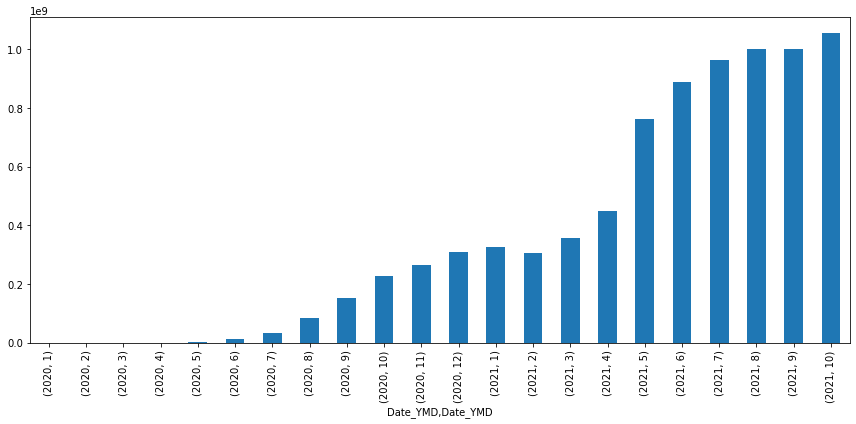

In [58]:
#infrence***(2)
plt.figure(figsize=(12,6))
a.plot(kind='bar')
plt.tight_layout()